# РК2

## ИУ5-63Б Ваксина Ия Р.

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

In [2]:
data = pd.read_csv('Stars.csv')

In [3]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
data.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [5]:
data.drop(['Color','Spectral_Class','Color'], axis = 1, inplace = True)

In [6]:
data.isnull().sum()
# проверим есть ли пропущенные значения

Temperature    0
L              0
R              0
A_M            0
Type           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  240 non-null    int64  
 1   L            240 non-null    float64
 2   R            240 non-null    float64
 3   A_M          240 non-null    float64
 4   Type         240 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 9.5 KB


In [8]:
data.head()

,Temperature,L,R,A_M,Type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0


<AxesSubplot:>

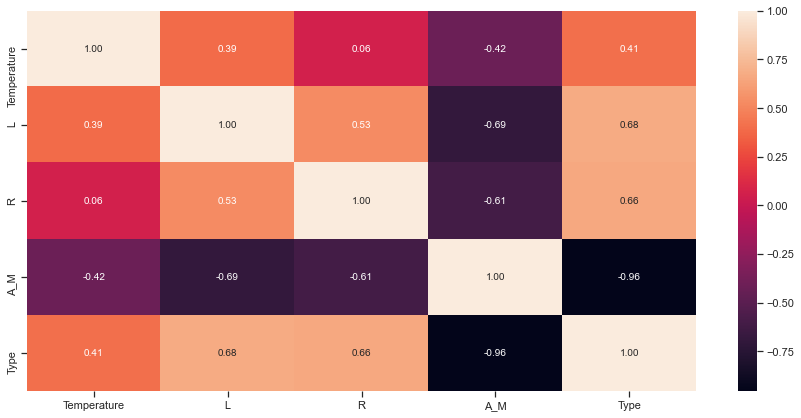

In [9]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
data['L'] = data['L'].astype(int)
X = data.drop(['L'], axis = 1)
Y = data.L
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Temperature       R    A_M  Type
0         3068  0.1700  16.12     0
1         3042  0.1542  16.60     0
2         2600  0.1020  18.70     0
3         2800  0.1600  16.65     0
4         1939  0.1030  20.06     0 

Выходные данные:

 0    0
1    0
2    0
3    0
4    0
Name: L, dtype: int64


In [11]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      Temperature      R     A_M  Type
5           2840  0.110  16.980     0
22          7220  0.011  14.230     2
199         3463  0.675  14.776     1
97          7720  1.340   2.440     3
12          3134  0.196  13.210     1 

Входные параметры тестовой выборки:

      Temperature       R    A_M  Type
109        33421  67.000  -5.79     4
71          3607   0.380  10.12     1
37          6380   0.980   2.93     3
74          3550   0.291  10.89     1
108        24345  57.000  -6.24     4 

Выходные параметры обучающей выборки:

 5      0
22     0
199    0
97     7
12     0
Name: L, dtype: int64 

Выходные параметры тестовой выборки:

 109    352000
71          0
37          1
74          0
108    142000
Name: L, dtype: int64


In [12]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
from IPython.core.display import HTML
from sklearn.tree.export import export_text
tree_rules = export_text(clf, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [15]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [16]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 29120.574999999997
Средняя квадратичная ошибка: 5203187720.595
Median absolute error: 0.0
Коэффициент детерминации: 0.9230465292619281


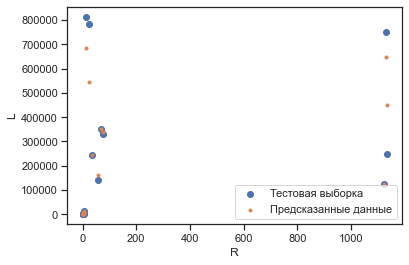

In [17]:
plt.scatter(X_test.R, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.R, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('R')
plt.ylabel('L')
plt.show()